### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 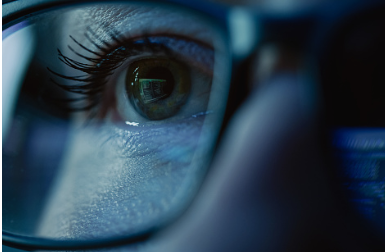 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

# Import necessary libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [2]:
import tensorflow as tf 
tf.random.set_seed(42)
np.random.seed(42)

# Data Preprocessing

In [3]:
# Define the path to the dataset
dataset_path = 'glasses/'

**Oversampling Minority Classes, In the given dataset there are 26 images of people without glasses and 60 images of people with glasses. To balance the dataset I am using Data augmentation to generate new images out of original image. Below code generates and saves the augmented images into the no_glasses directory.** 

In [4]:
def generate_aug_image():
    import os
    no_glasses_dir = 'glasses/no_glasses'
    augmented_dir = 'glasses/no_glasses'

    # Data augmentation generator
    datagen_no_glass = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    # Load and augment minority class images
    for img_name in os.listdir(no_glasses_dir):
        img_path = os.path.join(no_glasses_dir, img_name)
        img = np.expand_dims(plt.imread(img_path), axis=0)
        save_prefix = img_name.split('.')[0]
        i = 0
        for batch in datagen_no_glass.flow(img, batch_size=1, save_to_dir=augmented_dir, save_prefix=save_prefix, save_format='jpeg'):
            i += 1
            if i > 1:  # Generate two new images for each original
                break

# generate_aug_image()                

### Data Augmentation:

- Apply transformations like rotation, flipping, zoom, and brightness adjustments using ImageDataGenerator from Keras to increase data diversity.
- Augmentation helps prevent overfitting by introducing variations in the dataset, such as rotations, flips, and brightness adjustments.

In [5]:
# Data Augmentation and Normalization
datagen=ImageDataGenerator(
    rescale=1.0/255,          # Normalize pixel values
    rotation_range=20,        # Rotate images
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Horizontal flip
    validation_split=0.2      # Split for validation 
)

In [6]:
# Prepare training and validation data
train_ds=datagen.flow_from_directory(
    dataset_path,
    target_size=(256,256),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='training'
)

Found 111 images belonging to 2 classes.


In [7]:
print("Number of batches in train data: ",len(train_ds))

Number of batches in train data:  4


In [8]:
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='validation'
)

Found 27 images belonging to 2 classes.


In [9]:
print("Number of batches in validation data: ",len(val_data))

Number of batches in validation data:  1


In [10]:
train_ds.class_indices.keys()

dict_keys(['glasses', 'no_glasses'])

In [11]:
images,label=train_ds[0]

In [12]:
print("Label of 1st batch training data",label)

Label of 1st batch training data [1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 1.]


In [13]:
print("Image pixel values of 1st batch training data\n\n",images)

Image pixel values of 1st batch training data

 [[[[0.21134655 0.21329987 0.12260466]
   [0.21011458 0.21687849 0.12423454]
   [0.2075829  0.21997154 0.1232539 ]
   ...
   [0.28627452 0.28627452 0.15294118]
   [0.28627452 0.28627452 0.15294118]
   [0.28627452 0.28627452 0.15294118]]

  [[0.20319079 0.21255621 0.13008161]
   [0.19627719 0.20829946 0.12575075]
   [0.18887286 0.20633616 0.11970105]
   ...
   [0.28627452 0.28627452 0.15294118]
   [0.28627452 0.28627452 0.15294118]
   [0.28627452 0.28627452 0.15294118]]

  [[0.19322197 0.2056126  0.12250549]
   [0.19003321 0.21112444 0.12437981]
   [0.1785198  0.20731674 0.11798933]
   ...
   [0.28627452 0.28627452 0.15294118]
   [0.28627452 0.28627452 0.15294118]
   [0.2858944  0.2858944  0.15256107]]

  ...

  [[0.11714657 0.08033197 0.06034401]
   [0.11935573 0.08687673 0.07289912]
   [0.11739107 0.07975218 0.07007625]
   ...
   [0.35414645 0.3110092  0.22647205]
   [0.3432881  0.30015084 0.22077926]
   [0.32166937 0.28925428 0.21258052]

# Visualizing Sample Images

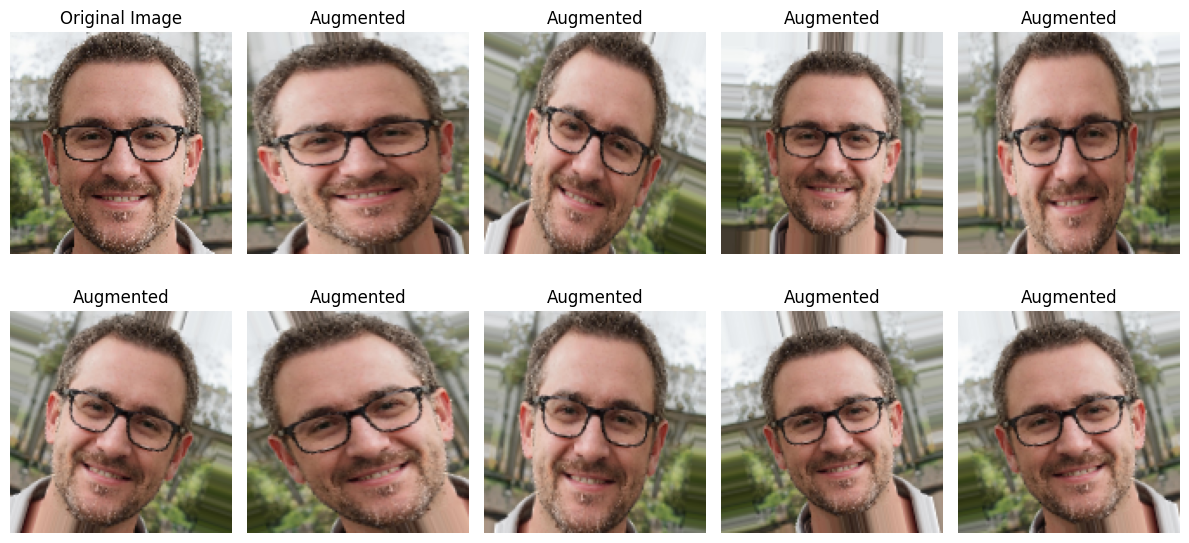

In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load a sample image
sample_image_path = 'glasses/glasses/face-1046.jpg'
img = load_img(sample_image_path, target_size=(128, 128))  # Load and resize the image
img_array = np.expand_dims(img, axis=0)  # Add batch dimension

# Apply augmentations using ImageDataGenerator
augmented_data = datagen.flow(img_array, batch_size=1)

# Plot the original image
plt.figure(figsize=(12, 6))
plt.subplot(2, 5, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

# Generate and plot augmented images
for i in range(9):
    augmented_image = next(augmented_data)[0]  # Generate augmented image
    plt.subplot(2, 5, i + 2)
    plt.imshow(augmented_image)
    plt.title("Augmented")
    plt.axis("off")

plt.tight_layout()
plt.show()


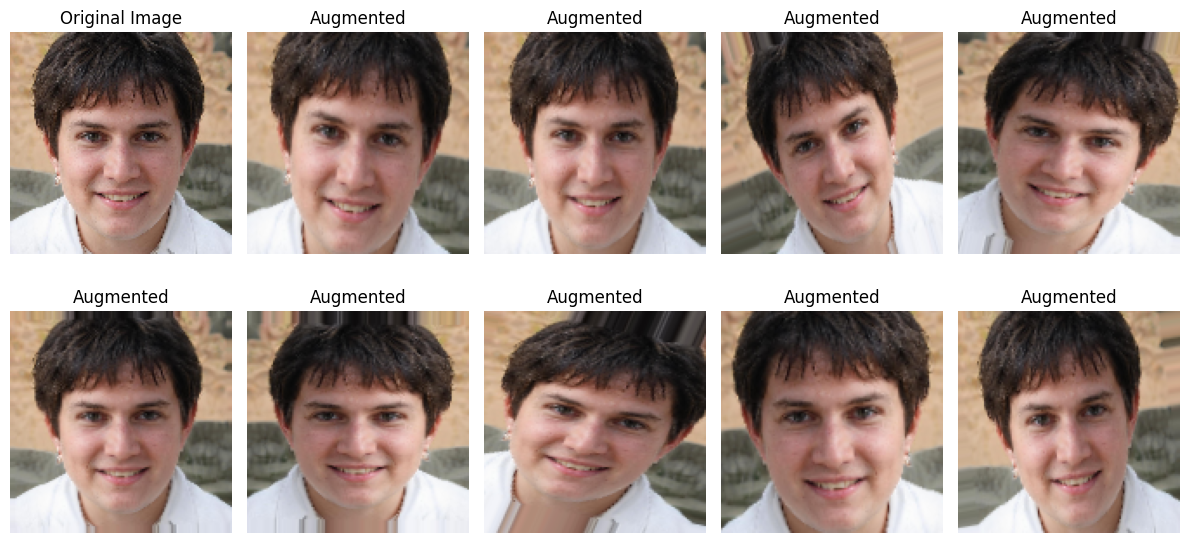

In [15]:
# Load a sample image
sample_image_path = 'glasses/no_glasses/face-1025.jpg'
img = load_img(sample_image_path, target_size=(128, 128))  # Load and resize the image
img_array = np.expand_dims(img, axis=0)  # Add batch dimension

# Apply augmentations using ImageDataGenerator
augmented_data = datagen.flow(img_array, batch_size=1)

# Plot the original image
plt.figure(figsize=(12, 6))
plt.subplot(2, 5, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

# Generate and plot augmented images
for i in range(9):
    augmented_image = next(augmented_data)[0]  # Generate augmented image
    plt.subplot(2, 5, i + 2)
    plt.imshow(augmented_image)
    plt.title("Augmented")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [16]:
def plot_sample_images(data,class_name):
    images,label=next(data)
    plt.figure(figsize=(12,8))
    for i in range(12):
        plt.subplot(4,3,i+1)
        plt.imshow(images[i])
        plt.title(class_name[int(label[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

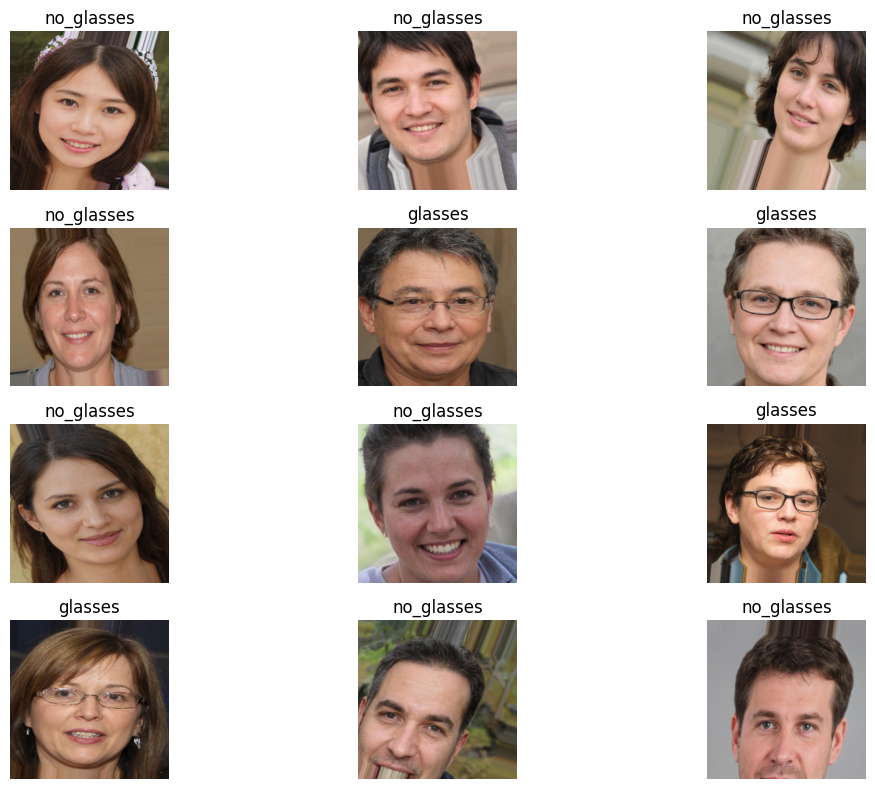

In [17]:
class_names=list(train_ds.class_indices.keys())
plot_sample_images(train_ds,class_names)

In [18]:
train_ds[0][0][0].shape # shape of each single image in train data

(256, 256, 3)

# Building the CNN Model

In [19]:
import warnings
warnings.filterwarnings('ignore')

### CNN Model Building

**architecture:**
    
- Input Layer: Accepts preprocessed images.
- Convolutional Layers: Extract features using filters.
- Pooling Layers: Reduce feature map dimensions.
- Fully Connected Layers: Learn higher-level representations.
- Output Layer: Binary classification (sigmoid activation).

**Parameter Explanation:**

- Filters: Number of kernels in a convolutional layer; increasing them extracts more features.
- Kernel Size: Size of the filter matrix (e.g., 3x3); smaller kernels capture finer details.
- Pooling Size: Size of the pooling window (e.g., 2x2); reduces spatial dimensions.
- Dropout: Randomly drops neurons during training to prevent overfitting.

In [20]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [21]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Training Parameters:

**Epochs:** Number of complete passes through the training data.
- Too few epochs may lead to underfitting.
- Too many epochs may cause overfitting.

**Batch Size:** Number of samples processed before updating the model's weights.
- Smaller batch sizes require more memory but allow finer weight updates.

**Impact of Epochs and Batch Sizes:**

- Fewer epochs: Faster training but may result in underfitting.
- More epochs: Improves accuracy but risks overfitting; use early stopping.
- Larger batch sizes: Faster but less precise weight updates.
- Smaller batch sizes: Slower but often more precise weight updates.

In [23]:
history=model.fit(
    train_ds,
    epochs=20,
    validation_data=val_data,
    batch_size=4
)

Epoch 1/20
4/4 [==============================] - 12s 1s/step - loss: 0.7032 - accuracy: 0.5495 - val_loss: 0.6931 - val_accuracy: 0.5556
Epoch 2/20
4/4 [==============================] - 4s 964ms/step - loss: 0.6919 - accuracy: 0.5676 - val_loss: 0.6866 - val_accuracy: 0.5556
Epoch 3/20
4/4 [==============================] - 4s 934ms/step - loss: 0.6878 - accuracy: 0.5676 - val_loss: 0.6858 - val_accuracy: 0.5556
Epoch 4/20
4/4 [==============================] - 4s 971ms/step - loss: 0.6853 - accuracy: 0.5676 - val_loss: 0.6868 - val_accuracy: 0.5556
Epoch 5/20
4/4 [==============================] - 4s 1s/step - loss: 0.6854 - accuracy: 0.5676 - val_loss: 0.6845 - val_accuracy: 0.5556
Epoch 6/20
4/4 [==============================] - 4s 947ms/step - loss: 0.6821 - accuracy: 0.5676 - val_loss: 0.6806 - val_accuracy: 0.5556
Epoch 7/20
4/4 [==============================] - 4s 1s/step - loss: 0.6757 - accuracy: 0.5676 - val_loss: 0.6698 - val_accuracy: 0.5556
Epoch 8/20
4/4 [============

# Model Evaluation

In [24]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

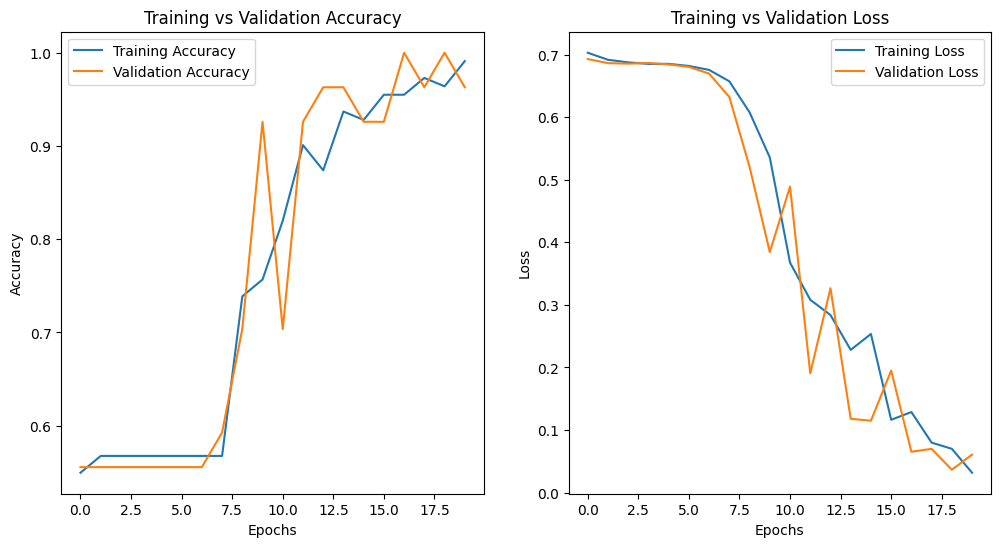

In [25]:
plot_training_history(history)

In [26]:
loss,accuracy=model.evaluate(val_data[0][0],val_data[0][1])
print('Accuracy: ',accuracy)
print('Loss: ',loss)

1/1 [==============================] - 0s 226ms/step - loss: 0.0155 - accuracy: 1.0000
Accuracy:  1.0
Loss:  0.015478597953915596


In [27]:
x_test,y_test=val_data[0]
print(x_test.shape)
print(y_test)

(27, 256, 256, 3)
[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1.]


In [28]:
y_pred=np.round(model.predict(x_test))
y_pred

1/1 [==============================] - 0s 298ms/step


array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       1.00      0.94      0.97        16

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



In [30]:
class_names

['glasses', 'no_glasses']

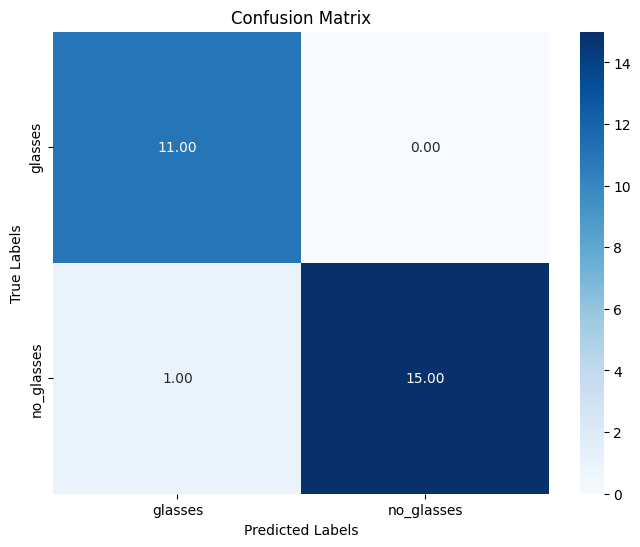

In [31]:
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",xticklabels=class_names, yticklabels=class_names, cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

(-0.5, 255.5, 255.5, -0.5)

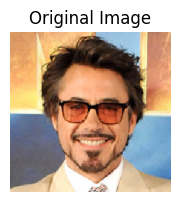

In [32]:
# Load a sample image
sample_image_path = 'test_image.jpg'
img = load_img(sample_image_path, target_size=(256, 256))  # Load and resize the image
img_array = np.expand_dims(img, axis=0)  

# Plot the original image
plt.figure(figsize=(12, 6))
plt.subplot(2, 5, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

In [33]:
class_names[int(model.predict(img_array))]

1/1 [==============================] - 1s 717ms/step


'glasses'

# Conclusion 
## CNN model is able to classify the people with and without glasses with nearly 96% accuracy.